In [2]:
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.patches import Rectangle

In [3]:
fits_path = 'indy_20160411_01.h5'

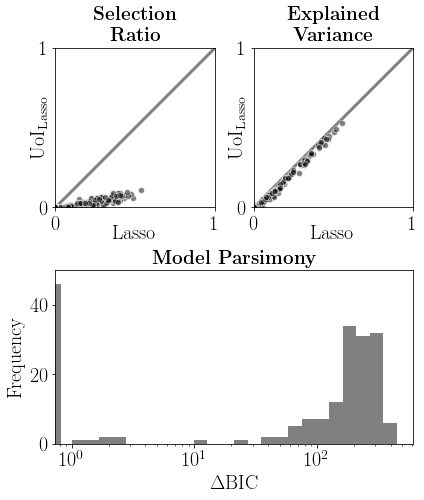

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(6, 7))

fits = h5py.File(fits_path, 'r')

# load different fits
lasso = fits['Lasso']
uoi = fits['UoI_Lasso_AIC']

n_targets = lasso['coupling_coefs'].shape[-1]

# split plot up into grid
sr = plt.subplot2grid((2, 2), (0, 0))
r2 = plt.subplot2grid((2, 2), (0, 1))
bic = plt.subplot2grid((2, 2), (1, 0), colspan=2)

# first plot: selection ratios #

# calculate selection ratios
lasso_selection_ratio = np.mean(
    np.count_nonzero(lasso['coupling_coefs'][:], axis=2
)/n_targets, axis=0)
uoi_selection_ratio = np.mean(
    np.count_nonzero(uoi['coupling_coefs'][:], axis=2
)/n_targets, axis=0)

# plot selection ratios
sr.scatter(
    lasso_selection_ratio,
    uoi_selection_ratio,
    alpha=0.5,
    color='k',
    edgecolor='w'
)
# identity line
sr.plot([0, 1], [0, 1], color='gray', linewidth=3, zorder=-1)

# axis ticks and limits
sr.set_xlim([0, 1])
sr.set_xticks([0, 1])
sr.set_ylim([0, 1])
sr.set_yticks([0, 1])
sr.set_aspect('equal')

# labels 
sr.set_xlabel(r'Lasso', fontsize=20, labelpad=-10)
sr.set_ylabel(r'UoI$_{\text{Lasso}}$', fontsize=20, labelpad=-12)
sr.set_title(r'\textbf{Selection}' '\n' r'\textbf{Ratio}', fontsize=19)


# second plot: explained variance #

# plot scatter points
r2.scatter(
    np.mean(lasso['r2'][:], axis=0),
    np.mean(uoi['r2'][:], axis=0),
    alpha=0.5,
    color='k',
    edgecolor='w'
)
# identity line
r2.plot([0, 1], [0, 1], color='gray', linewidth=3, zorder=-1)

# axis ticks and limits
r2.set_xlim([0, 1])
r2.set_xticks([0, 1])
r2.set_ylim([0, 1])
r2.set_yticks([0, 1])
r2.set_aspect('equal')

# labels
r2.set_xlabel(r'Lasso', fontsize=20, labelpad=-10)
r2.set_ylabel(r'UoI$_{\text{Lasso}}$', fontsize=20, labelpad=-12)
r2.set_title(r'\textbf{Explained}' '\n' r'\textbf{Variance}', fontsize=19)

# third plot: Bayesian information criterion #

# calculate difference in BIC
del_bic = np.mean(lasso['BIC'][:] - uoi['BIC'][:], axis=0)

# extract BIC differences that are greater than zero
n_zeros_del_bic = np.count_nonzero(del_bic == 0)
del_bic = del_bic[del_bic != 0]
# plot histogram of non-zero BIC elements
_, _, patches = bic.hist(
    del_bic,
    bins=np.logspace(0, np.log10(450), num=25),
    color='gray'
)
bic.set_xscale('log')
bic.set_ylim([0, 50])
# tack on the zero BIC elements
r = Rectangle(
    xy=(0, 0),
    height=n_zeros_del_bic,
    width=0.8,
    fill=True,
    color='gray'
)
bic.add_patch(r)
 
# labels
bic.set_xlabel(r'$\Delta$BIC', fontsize=20)
bic.set_ylabel(r'Frequency', fontsize=20)
bic.set_title(r'\textbf{Model Parsimony}', fontsize=19)

plt.tight_layout()
plt.savefig('Fig3.eps')